## IRIS DATA CLASSIFICATION

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Loading and understanding the Dataset

In [3]:
df=pd.read_csv('iris_dataset.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [8]:
df.shape

(150, 5)

#### Data Preprocessing

#### Checking for missing values

In [9]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Detecting outliers

<AxesSubplot:>

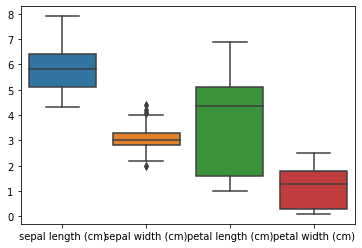

In [10]:
sns.boxplot(data=df)

#### Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

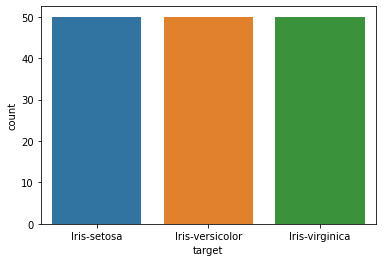

In [11]:
sns.countplot(x="target",data=df)

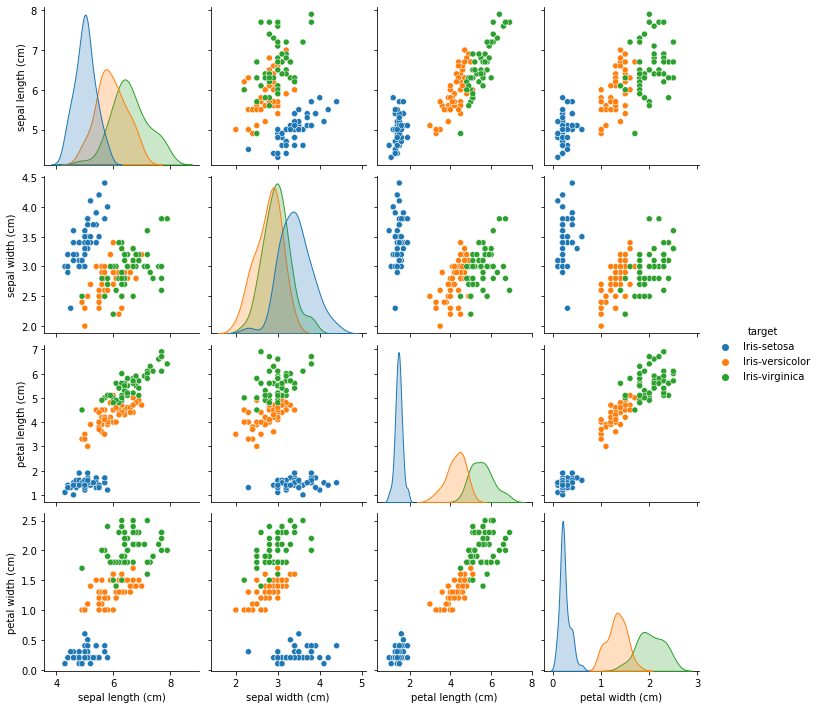

In [12]:
sns.pairplot(df,height=2.5,hue='target')

<AxesSubplot:>

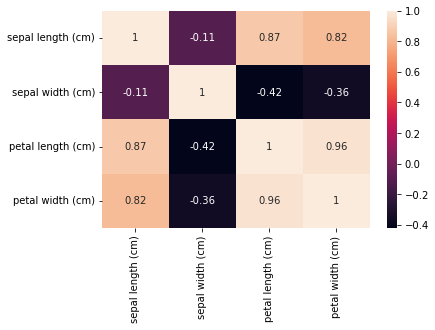

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

#### Encoding

since target is an object over here, we have to convert it to numerical

In [15]:
df['target'].nunique()

3

In [16]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df["target"]=LabelEncoder().fit_transform(df["target"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Dependent Independent Classification

In [19]:
x=df.drop("target",axis=1)
y=df["target"]

#### Train and test split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)

In [21]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [22]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
118,7.7,2.6,6.9,2.3
15,5.7,4.4,1.5,0.4
123,6.3,2.7,4.9,1.8
135,7.7,3.0,6.1,2.3
32,5.2,4.1,1.5,0.1
1,4.9,3.0,1.4,0.2
116,6.5,3.0,5.5,1.8
45,4.8,3.0,1.4,0.3


In [23]:
y_train

81     1
99     1
119    2
12     0
16     0
      ..
87     1
103    2
67     1
24     0
8      0
Name: target, Length: 120, dtype: int32

In [24]:
y_test

128    2
11     0
118    2
15     0
123    2
135    2
32     0
1      0
116    2
45     0
40     0
115    2
26     0
28     0
145    2
97     1
62     1
77     1
122    2
112    2
125    2
31     0
146    2
29     0
69     1
149    2
75     1
20     0
73     1
120    2
Name: target, dtype: int32

#### Model fitting

In [25]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred=model.predict(x_test)
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

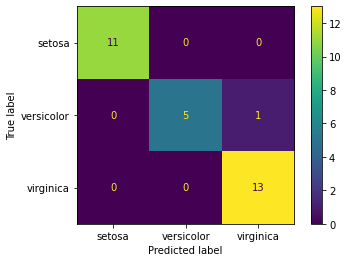

In [47]:
disp=ConfusionMatrixDisplay(cm,display_labels=["setosa","versicolor","virginica"])
disp.plot()
plt.show()


In [48]:
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.9666666666666667